In [27]:
import pandas as pd
import numpy as np

In [28]:
data=pd.read_csv('casestudy.csv')

In [29]:
data.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


# Total revenue for the current year

In [30]:
data.groupby('year')['net_revenue'].sum()

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64

# New Customers revenue e.g. new customers not present in previous year only

In [31]:
#revenue of new customers in 2016
customers2016 = set(data[data['year']==2016]['customer_email'])
customers2015 = set(data[data['year']==2015]['customer_email'])
newcustomers2016 = list(customers2016 - ((customers2015).intersection(customers2016)))
newcustomer2016df = data[data['customer_email'].isin(newcustomers2016)]
newcustomer2016revenue = newcustomer2016df[newcustomer2016df["year"]==2016]["net_revenue"].sum()

print(newcustomer2016revenue)



18245491.01


In [32]:
#revenue of new customers in 2017
customers2017 = set(data[data['year']==2017]['customer_email'])
customers2016 = set(data[data['year']==2016]['customer_email'])
newcustomers2017 = list(customers2017 - ((customers2016).intersection(customers2017)))
newcustomer2017df = data[data['customer_email'].isin(newcustomers2017)]
newcustomer2017revenue = newcustomer2017df[newcustomer2017df["year"]==2017]["net_revenue"].sum()

print(newcustomer2017revenue)

28776235.039999995


# Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [33]:
# assuming existing customers means the customer who still exists from the last year

# existing customer growth for 2017
customers2017 = set(data[data['year']==2017]['customer_email'])
customers2016 = set(data[data['year']==2016]['customer_email'])

existingcustomers2017 = list(customers2017.intersection(customers2016))
existingcustomers2017df = data[data['customer_email'].isin(existingcustomers2017)]
existingcustomergrowth2017 = existingcustomers2017df[existingcustomers2017df["year"]==2017]["net_revenue"].sum() - existingcustomers2017df[existingcustomers2017df["year"]==2016]["net_revenue"].sum()

print(existingcustomergrowth2017)


20611.340000000317


In [34]:
# assuming existing customers means the customer who still exists from the last year

# existing customer growth for 2016
customers2016 = set(data[data['year']==2016]['customer_email'])
customers2015 = set(data[data['year']==2015]['customer_email'])

existingcustomers2016 = list(customers2016.intersection(customers2015))
existingcustomers2016df = data[data['customer_email'].isin(existingcustomers2016)]
existingcustomergrowth2016 = existingcustomers2016df[existingcustomers2016df["year"]==2016]["net_revenue"].sum() - existingcustomers2016df[existingcustomers2016df["year"]==2015]["net_revenue"].sum()

print(existingcustomergrowth2016)

20335.459999999963


# Revenue lost from attrition

In [35]:
# revenue lost from attrition is the total revenue that we lost from the customers we lost in subsequent years

#revenue lost from attrition in 2017
customers2017 = set(data[data['year']==2017]['customer_email'])
customers2016 = set(data[data['year']==2016]['customer_email'])
lostcustomers2017 = list(customers2016 - ((customers2017).intersection(customers2016)))
lostcustomers2017df = data[data['customer_email'].isin(lostcustomers2017)]
revenuelostfromattrition2017 = lostcustomers2017df[lostcustomers2017df["year"]==2016]["net_revenue"].sum()
print(revenuelostfromattrition2017)



23110294.939999998


In [36]:
#revenue lost from attrition in 2016
customers2016 = set(data[data['year']==2016]['customer_email'])
customers2015 = set(data[data['year']==2015]['customer_email'])
lostcustomers2016 = list(customers2015 - ((customers2016).intersection(customers2015)))
lostcustomers2016df = data[data['customer_email'].isin(lostcustomers2016)]
revenuelostfromattrition2016 = lostcustomers2016df[lostcustomers2016df["year"]==2015]["net_revenue"].sum()
print(revenuelostfromattrition2016)

21571632.070000004


# Existing Customers revenue current year

In [37]:
# assuming existing customers means the customer who still exists from the last year
# existing customer revenue for 2017
customers2017 = set(data[data['year']==2017]['customer_email'])
customers2016 = set(data[data['year']==2016]['customer_email'])

existingcustomers2017 = list(customers2017.intersection(customers2016))
existingcustomers2017df = data[data['customer_email'].isin(existingcustomers2017)]
existingcustomerrevenuecuryear2017 = existingcustomers2017df[existingcustomers2017df["year"]==2017]["net_revenue"].sum() 
print(existingcustomerrevenuecuryear2017)

2641259.99


In [38]:
# assuming existing customers means the customer who still exists from the last year
# existing customer growth for 2016
customers2016 = set(data[data['year']==2016]['customer_email'])
customers2015 = set(data[data['year']==2015]['customer_email'])

existingcustomers2016 = list(customers2016.intersection(customers2015))
existingcustomers2016df = data[data['customer_email'].isin(existingcustomers2016)]
existingcustomerrevenuecuryear2016 = existingcustomers2016df[existingcustomers2016df["year"]==2016]["net_revenue"].sum()
print(existingcustomerrevenuecuryear2016)

7485452.58


# Existing Customers revenue previous year

In [39]:
# assuming existing customers means the customer who still exists from the last year
# existing customer revenue for 2017
customers2017 = set(data[data['year']==2017]['customer_email'])
customers2016 = set(data[data['year']==2016]['customer_email'])

existingcustomers2017 = list(customers2017.intersection(customers2016))
existingcustomers2017df = data[data['customer_email'].isin(existingcustomers2017)]
existingcustomerrevenueprevyear2017 = existingcustomers2017df[existingcustomers2017df["year"]==2016]["net_revenue"].sum() 
print(existingcustomerrevenueprevyear2017)

2620648.65


In [40]:
# assuming existing customers means the customer who still exists from the last year
# existing customer growth for 2016
customers2016 = set(data[data['year']==2016]['customer_email'])
customers2015 = set(data[data['year']==2015]['customer_email'])

existingcustomers2016 = list(customers2016.intersection(customers2015))
existingcustomers2016df = data[data['customer_email'].isin(existingcustomers2016)]
existingcustomerrevenueprevyear2016 = existingcustomers2016df[existingcustomers2016df["year"]==2015]["net_revenue"].sum()
print(existingcustomerrevenueprevyear2016)

7465117.12


# Total Customers current year

In [41]:
# total customers current year for 2017
customers2015 = data[data['year']==2015]
len(customers2015)

231294

In [42]:
# total customers current year for 2016
customers2016 = data[data['year']==2016]
len(customers2016)

204646

In [43]:
# total customers current year for 2017
customers2017 = data[data['year']==2017]
len(customers2017)

249987

# Total Customers Previous Year

In [44]:
#total customer previous year for 2017
customers2017prevyear = data[data['year']==2016]
len(customers2017prevyear)


204646

In [45]:
#total customers previous year for 2016
customers2016prevyear = data[data['year']==2015]
len(customers2016prevyear)

231294

# New Customers

In [46]:
#new customers in 2016
customers2016 = set(data[data['year']==2016]['customer_email'])
customers2015 = set(data[data['year']==2015]['customer_email'])
newcustomers2016 = (customers2016 - ((customers2015).intersection(customers2016)))
newcustomers2016

{' krdzphrkrr@gmail.com',
 ' inbkqairdm@gmail.com',
 'tlysunreou@gmail.com',
 'qawrcdrfqo@gmail.com',
 ' gzsnjurplh@gmail.com',
 'hfovzykwch@gmail.com',
 ' finyvvtefl@gmail.com',
 'nlymmupvpz@gmail.com',
 'mltpgiarcf@gmail.com',
 'zkwjnwbhzz@gmail.com',
 ' sfjwgaruom@gmail.com',
 'gowvhxxedv@gmail.com',
 ' ophblphpms@gmail.com',
 'xchlupldpq@gmail.com',
 ' ojudslyzzg@gmail.com',
 'rmjfgytbwj@gmail.com',
 'akdshjowdk@gmail.com ',
 ' jnbffylfha@gmail.com',
 'jvckitxzvh@gmail.com',
 'kjfazwchnz@gmail.com ',
 ' ymuhvjwznb@gmail.com',
 ' tctcqrdfbv@gmail.com',
 'rldiidbixx@gmail.com',
 ' buyvsvpaoj@gmail.com',
 ' akydxefjwa@gmail.com',
 'hgzrjryvss@gmail.com',
 ' kbcsstjvad@gmail.com',
 ' ysrsoibexd@gmail.com',
 ' hootgejrpq@gmail.com',
 'igvtplkyfk@gmail.com',
 'nkmgzmpilt@gmail.com',
 ' cupuxhmxbl@gmail.com',
 'girvpdslcl@gmail.com',
 'qzexnrmcgu@gmail.com',
 ' yjdaxpyune@gmail.com',
 ' dpodlqmwsx@gmail.com',
 ' awjajlxtfa@gmail.com',
 ' hftgsivdnd@gmail.com',
 'otycwzbzmi@gmail.com',
 ' 

In [47]:
#new customers in 2017
customers2017 = set(data[data['year']==2017]['customer_email'])
customers2016 = set(data[data['year']==2016]['customer_email'])
newcustomers2017 = customers2017 - ((customers2017).intersection(customers2016))
newcustomers2017

{'fgsmjsqcpf@gmail.com',
 'emigdnklrf@gmail.com',
 'squcsowzkf@gmail.com',
 'zwelejkfky@gmail.com',
 'oemwqbllpz@gmail.com',
 ' wqkzjcuwta@gmail.com',
 ' fchocdqcel@gmail.com',
 'uatrjlhhcc@gmail.com',
 ' qfzrxuyasi@gmail.com',
 'mwzpvmlkvq@gmail.com',
 ' fukhkzazwu@gmail.com',
 'olzxytdltu@gmail.com',
 ' izzymllctj@gmail.com',
 'xujruwwoai@gmail.com',
 'idqwpujhiz@gmail.com',
 ' euqmzkcxsd@gmail.com',
 'sictgpkqkw@gmail.com',
 'anbnxxdcpm@gmail.com',
 'tmeetjlcsc@gmail.com ',
 'cpcysfvtjx@gmail.com',
 ' omvoyaiqym@gmail.com',
 'orwbcyecji@gmail.com',
 'eyrpzcofbu@gmail.com',
 ' vvnhksznje@gmail.com',
 'fqncqkcjwl@gmail.com',
 'jccjmlwlwp@gmail.com ',
 ' aseuxvcald@gmail.com',
 'caqnmhuegf@gmail.com',
 ' nzygrrrrjs@gmail.com',
 ' ahdiaqtmsh@gmail.com',
 ' uxgtjyxxuo@gmail.com',
 'vljolofctl@gmail.com',
 'warseisyzd@gmail.com',
 'jowhnomcbs@gmail.com',
 'rwfwdxalxl@gmail.com',
 'gkyoutgdsp@gmail.com',
 'wwnjxadtyb@gmail.com',
 'bahjspcjhi@gmail.com',
 'fssytrrorx@gmail.com',
 ' vyltccte

# Lost Customers

In [48]:
#lost customers in 2016
customers2016 = set(data[data['year']==2016]['customer_email'])
customers2015 = set(data[data['year']==2015]['customer_email'])
lostcustomers2016 = (customers2015 - ((customers2015).intersection(customers2016)))
lostcustomers2016

{'ujktilfvyk@gmail.com ',
 ' iyhmaajdiw@gmail.com',
 'mbpsjpjysk@gmail.com',
 'qhyvrhurqc@gmail.com',
 'hvpqldfukm@gmail.com',
 'akqbqofnvv@gmail.com',
 'utijelwini@gmail.com',
 'jdtxopiaud@gmail.com ',
 'tzfmboeusi@gmail.com',
 'ihgwqtrmqc@gmail.com',
 'hzdqtrjwgt@gmail.com',
 'ymenqhlbqj@gmail.com',
 ' ehnytyylml@gmail.com',
 'oalfyaqsry@gmail.com',
 'wstyhnpldz@gmail.com ',
 'dbuhdiwvqt@gmail.com',
 'dgzjnbizdi@gmail.com',
 'vlbzyqjadl@gmail.com',
 ' foamwtbwoe@gmail.com',
 ' bylaciimcs@gmail.com',
 ' xjzoxxcwhh@gmail.com',
 'erexknqfpf@gmail.com',
 ' hfeonjpbht@gmail.com',
 'ezzitzapsg@gmail.com',
 'nczczchkom@gmail.com',
 'pirtahxxkm@gmail.com',
 'skqboqzamh@gmail.com',
 'cubvpdoyhk@gmail.com',
 'kdkiakrjng@gmail.com',
 'vvshoptrkn@gmail.com',
 'bldyhfyued@gmail.com',
 'tbmwhggieq@gmail.com',
 ' gdzeeqxunf@gmail.com',
 'dbmieeklna@gmail.com',
 'jsnavdcejs@gmail.com',
 'abltnrxqay@gmail.com ',
 'yzqxmbrvuk@gmail.com ',
 ' jxeeafffxu@gmail.com',
 'cndowxvtnv@gmail.com',
 'vvsagobomi

In [49]:
#lost customers in 2017
customers2017 = set(data[data['year']==2017]['customer_email'])
customers2016 = set(data[data['year']==2016]['customer_email'])
lostcustomers2017 = (customers2016 - ((customers2017).intersection(customers2016)))
lostcustomers2017


{' krdzphrkrr@gmail.com',
 'tlysunreou@gmail.com',
 'hwdowsdobh@gmail.com',
 'zkwjnwbhzz@gmail.com',
 'iauqotqxib@gmail.com',
 'xchlupldpq@gmail.com',
 'rmjfgytbwj@gmail.com',
 ' imgwwnactf@gmail.com',
 ' ojudslyzzg@gmail.com',
 'akdshjowdk@gmail.com ',
 ' buyvsvpaoj@gmail.com',
 'hgzrjryvss@gmail.com',
 ' kbcsstjvad@gmail.com',
 ' ispjrqfyxg@gmail.com',
 ' ysrsoibexd@gmail.com',
 ' hootgejrpq@gmail.com',
 ' vwswwlskia@gmail.com',
 'girvpdslcl@gmail.com',
 'qzexnrmcgu@gmail.com',
 ' yjdaxpyune@gmail.com',
 'tnhjjwnvsh@gmail.com',
 ' awjajlxtfa@gmail.com',
 'nfdhhndddv@gmail.com',
 ' thrldentbx@gmail.com',
 'scjpzlquvg@gmail.com',
 ' becchhaszu@gmail.com',
 'tfiszsxmht@gmail.com',
 ' cpspaojqsv@gmail.com',
 ' uvintixzzg@gmail.com',
 'auiwdjirmr@gmail.com',
 'ryapkoieid@gmail.com',
 'hpcjigaviy@gmail.com',
 ' ryzwsmpids@gmail.com',
 ' mbuikzyymh@gmail.com',
 'mxdvokfnlk@gmail.com ',
 ' xvczhntpbo@gmail.com',
 ' ckzzpazjuz@gmail.com',
 ' sdqimspnww@gmail.com',
 ' punccypqyy@gmail.com',
 '

# Plots from the information

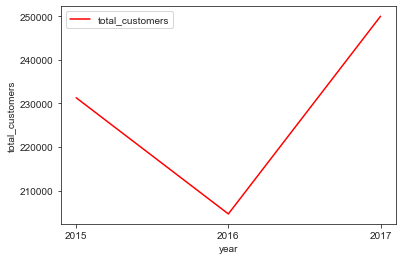

In [50]:
# plotting lineplots between year and total_customers
import matplotlib.pyplot as plt
years = ["2015","2016","2017"]
total_customers = [len(customers2015),len(customers2016),len(customers2017)]
plt.plot(years,list(total_customers), color='r', label='total_customers')
plt.xlabel('year')
plt.ylabel('total_customers')
plt.legend()
plt.show()


As we can see from the line plot the number of customers dropped from 2015 to 2016 but increased again in 2017.

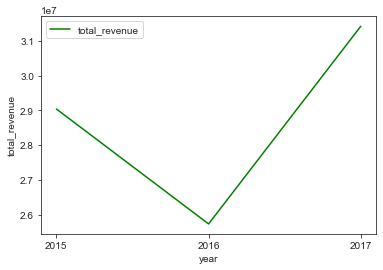

In [51]:
# plotting lineplots between year and total_customers
import matplotlib.pyplot as plt
years = ["2015","2016","2017"]
total_revenue = [29036749.19,25730943.59,31417495.03]
plt.plot(years,total_revenue, color='g', label='total_revenue')
plt.xlabel('year')
plt.ylabel('total_revenue')
plt.legend()
plt.show()

As we can see the shape of the graph is similar to that of total customers in that year.Hence we assume that the total_cutomers is highly correlated to revenue that year.

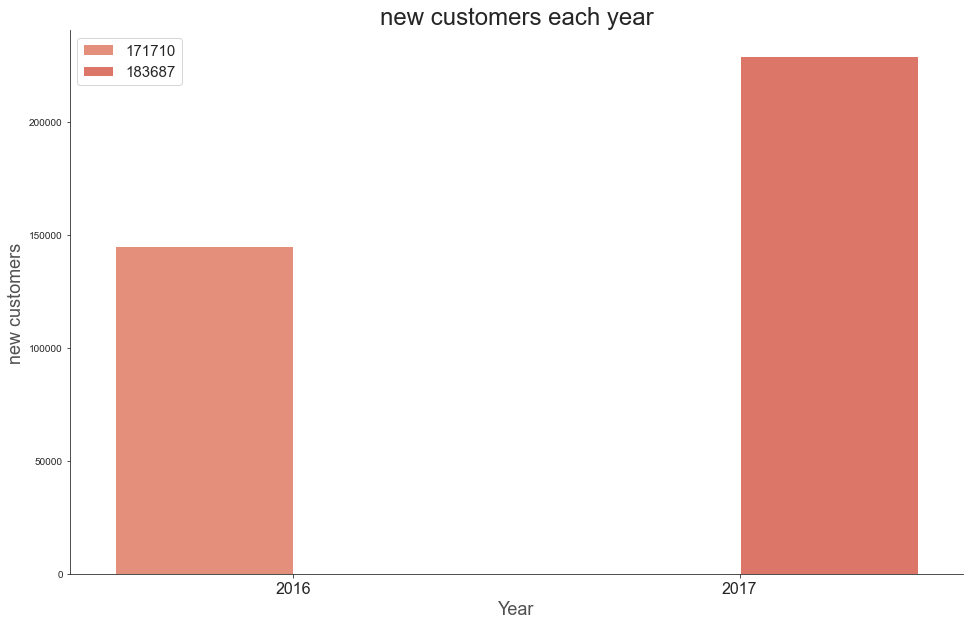

In [52]:
import seaborn as sns
data_viz = {'index': [0, 1],
        'new_customers': [len(newcustomers2016),len(newcustomers2017)],
        'lost_customers': [len(lostcustomers2016),len(lostcustomers2017)]}

df = pd.DataFrame(data_viz)

year = ["2016","2017"]

plt.figure(figsize=(16,10));
sns.set_style('ticks')
ax = sns.barplot(data=df, \
                 x='index', \
                 y='new_customers', \
                 hue='lost_customers', \
                 palette=sns.color_palette("Reds_d", n_colors=7, desat=1))

ax.set_xlabel("Year", fontsize=18, alpha=0.8)
ax.set_ylabel("new customers", fontsize=18, alpha=0.8)
ax.set_title("new customers each year", fontsize=24)
ax.set_xticklabels(year, fontsize=16)
ax.legend(fontsize=15)
sns.despine()
plt.show()

The bar plot helps us visualize and compare new customers that were gained in 2016 and 2017.The color hue is proportional to the customers lost that year.This visualization easily helps us see that:

    1- new customers in 2017 are higher in number in 2016.
    
    2- The color hue helps us understand that new customers is positively correlated to lost customers because as the number of new customers increase the number of lost customers increase as well.